<a href="https://colab.research.google.com/github/jessicamotam/Projeto-Bank-Marketing_ICD/blob/main/Projeto_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)

#####The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

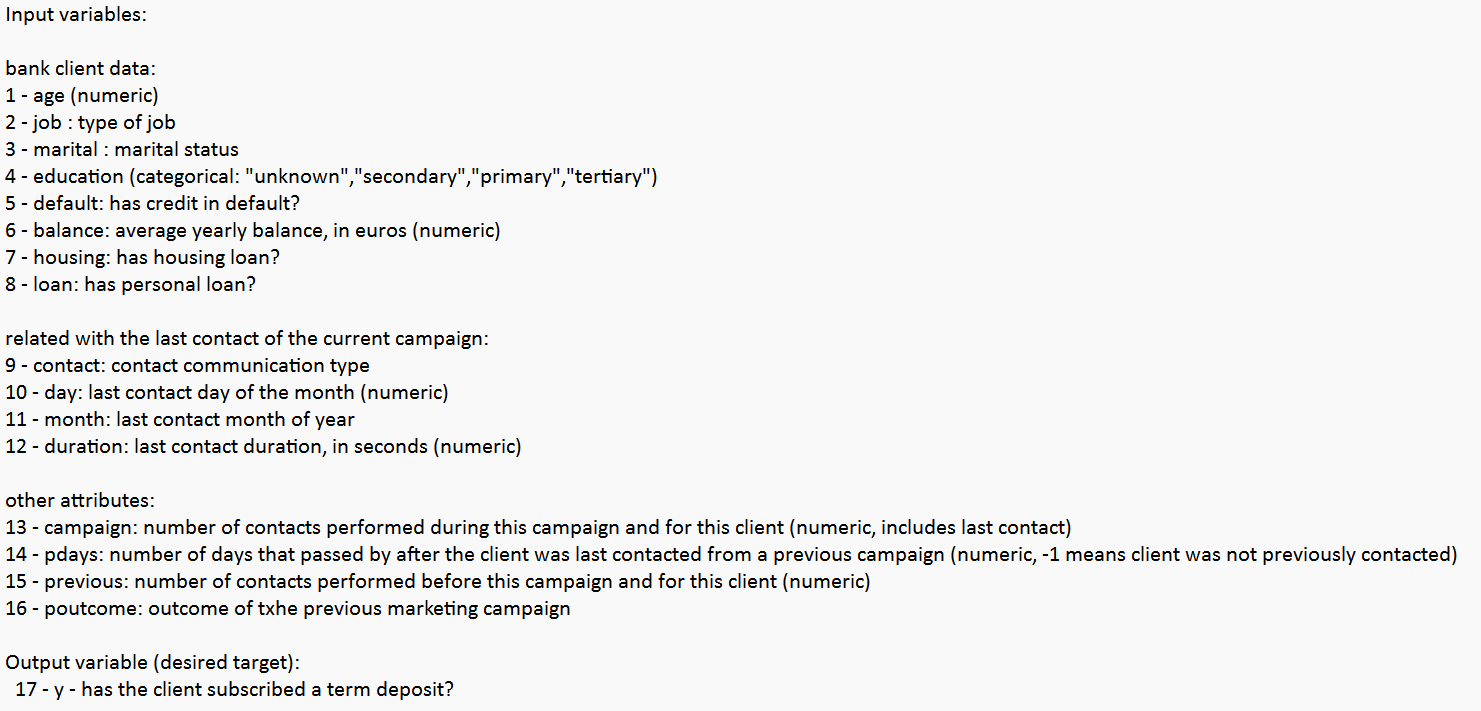

# Importando o DataFrame

In [2]:
#biblioteca para importar Data Frame UC Irvine
!pip install ucimlrepo

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#IMPORTANDO DATASET

from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

df = pd.DataFrame(X, columns=bank_marketing.data.features_names)

 #add y a uma coluna do df
df['y'] = y

df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


# Explorando o DataFrame

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
#verificando quantidade de linhas e colunas
df.shape

(45211, 17)

### Limpeza dos Dados

In [28]:
#verificando se há valores ausentes
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [27]:
#Quantitade total de valores ausentes
#df.isna().sum()

#quantidade de valores ausentes(NaN) em cada coluna

(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
      'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome','y']].
    isna().
    sum().
    sort_values(ascending=False)

)

,0
poutcome,36959
contact,13020
education,1857
job,288
month,0
previous,0
pdays,0
campaign,0
duration,0
age,0


####Análise: existe muitos VALORES AUSENTES. O que fazer?

---



In [18]:
#3 primeiras linhas
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


In [17]:
#Verificando quantidade de duplicados
df.duplicated().sum()

0

### GROUP BY (testando)

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [30]:
#Verificando a idade media em cada profissão
gp_trabalho_idade = (df[['job','age']].
    groupby('job').
    mean().
    sort_values(by='age')
)

Text(0, 0.5, 'age')

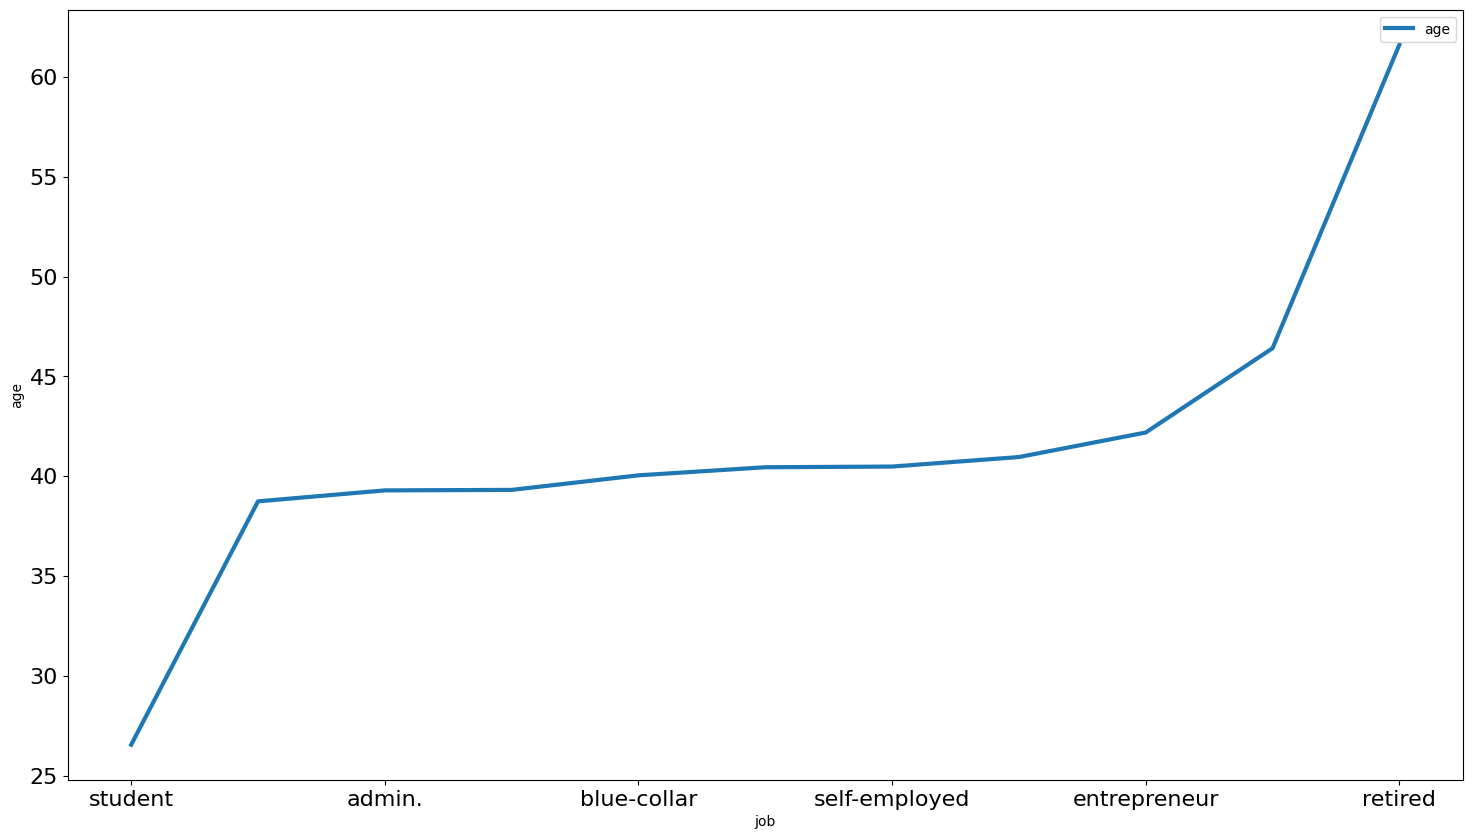

In [39]:
#Plotando gráfico de linhas para analisar as idades médias das pessoas de cada profissão
gp_trabalho_idade.plot(figsize=(18,10), fontsize=16, lw=3)
plt.xlabel('job')
plt.ylabel('age')

####Análise:

In [38]:
#Verificando o saldo médio anual das pessoas que aceitaram um depósito



,month
0,may
1,may
2,may
3,may
4,may
...,...
45206,nov
45207,nov
45208,nov
45209,nov
